# Problem Statement-

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

In [64]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [65]:
#Read csv file and convert into Dataframe
data=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observation-

The features in the above data set are-

- latitude     (geolocation in decimal degrees)

- longitude    (geolocation in decimal degrees)

- commissioning_year (year of plant operation, weighted by unit-capacity when data is available)

- geolocation_source  (attribution for geolocation information)

- other_fuel1  (energy source used in electricity generation or export)

- generation_gwh_2014 (electricity generation in gigawatt-hours reported for the year 2014)

- generation_gwh_2015 (electricity generation in gigawatt-hours reported for the year 2015)

- generation_gwh_2016 (electricity generation in gigawatt-hours reported for the year 2016)

- generation_gwh_2017 (electricity generation in gigawatt-hours reported for the year 2017)

- generation_gwh_2018 (electricity generation in gigawatt-hours reported for the year 2018)
 
The label in the given dataset is-

- primary_fuel  [Classification] (energy source used in primary electricity generation or export)

- capacity_mw   [Regression] (electrical generating capacity in megawatts)

The columns not required-

- country       (3 character country code corresponding to the ISO 3166-1 alpha-3 specification)
         - As the entire column has only India as the country, it has no influence on the model

- country_long  (longer form of the country designation)
         - As the entire column has only India as the country, it has no influence on the model

- name          (name or title of the power plant, generally in Romanized form)
         - As each name is unique, it does not influence the model

- gppd_idnr     (10 or 12 character identifier for the power plant)
         - Each plant has its own unique id, not influencing the model

- owner         (majority shareholder of the power plant, generally in Romanized form)
         - As the owner of each plant is almost unique, hence not influencing the model
 
- source        (entity reporting the data; could be an organization, report, or document, generally in Romanized form)
         - As the source of each plant is almost unique, hence not influencing the model

- url           (web document corresponding to the source field)
         - Each plant has its own url, not influencing the model
 
- wepp_id       (a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.)
         - Each plant has its own unique id, not influencing the model

- other_fuel2  (energy source used in electricity generation or export)
         - As the column is empty it is safe to drop it

- other_fuel3  (energy source used in electricity generation or export)
         - As the column is empty it is safe to drop it
         
- year_of_capacity_data (year the capacity information was reported)
         - As the year is 2019 as same for all, will not influence the model

- generation_gwh_2013 (electricity generation in gigawatt-hours reported for the year 2013)
        - As the column is empty it is safe to drop it

- generation_gwh_2019 (electricity generation in gigawatt-hours reported for the year 2019)
        - As the column is empty it is safe to drop it

- generation_data_source (attribution for the reported generation information)
        - As the entire column is filled with one value "Central Electricity Authority", it has no significant influence on the model

- estimated_generation_gwh (estimated electricity generation in gigawatt-hours)
        - As the column is empty it is safe to drop it

In [66]:
#shape of file
data.shape

(907, 27)

In [67]:
# Checking for data types of the columns
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# 
As there are object datatypes, we will apply encoding techniques

In [68]:
#Dropping unnecessary columns as it as no significant influence
data=data.drop(columns=["country", "country_long", "name", "gppd_idnr", "owner", "source", "url", "other_fuel2", "other_fuel3", "wepp_id", "year_of_capacity_data", "generation_gwh_2013", "generation_gwh_2019", "generation_data_source", "estimated_generation_gwh"])

In [69]:
# Checking for null values
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

# 
The null values will be dealt post encoding

# Encoding object data into numeric data

In [70]:
#Keeping the value counts of the features being encoded prior to encoding them, in order to be able to label them post encoding

print(data["primary_fuel"].value_counts())
print(data["other_fuel1"].value_counts())
print(data["geolocation_source"].value_counts())

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64
WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


In [71]:
#Encoding the features using LabelEncoder

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

for column in data:
    if data[column].dtype=='object':
        df=enc.fit_transform(data[column])
        data[column]=df

In [72]:
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,3,2011.0,1,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,3,NaN,2,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,NaN,2,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,2,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,3,NaN,0,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,7,3,NaN,2,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,1,3,NaN,2,NaN,NaN,NaN,NaN,NaN


# Observation-

The categorical data for the below features have been encoded into numeric based on alphabetic order as follows-

- primary_fuel-
       - 0- Biomass
       - 1- Coal
       - 2- Gas
       - 3- Hydro
       - 4- Nuclear
       - 5- Oil
       - 6- Solar
       - 7- Wind
        
- other_fuel1-
       - 0- Cogeneration
       - 1- Gas
       - 2- Oil
       - 3- Null
        
- geolocation_source-
       - 0- Industry About
       - 1- National Renewable Energy Laboratory
       - 2- WRI
       - 3- Null

In [73]:
#Statistical Analysis
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,907.000000,907.000000,527.000000,907.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,3.206174,2.777288,1997.091082,1.754135,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,2.280652,0.429348,17.082868,0.700183,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1.000000,3.000000,1988.000000,2.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,3.000000,3.000000,2001.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,6.000000,3.000000,2012.000000,2.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,7.000000,3.000000,2018.000000,3.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


# Observation:
    
- capacity_mw, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 have their minimum values as 0, but that is not possible, hence they are being replaced ny Nan

# Imputing the null values

In [74]:
#Replacing the 0 values as NAN to be subjected to imputing

data['capacity_mw']=data['capacity_mw'].replace(0,np.nan)
data['generation_gwh_2014']=data['generation_gwh_2014'].replace(0,np.nan)
data['generation_gwh_2015']=data['generation_gwh_2015'].replace(0,np.nan)
data['generation_gwh_2016']=data['generation_gwh_2016'].replace(0,np.nan)
data['generation_gwh_2017']=data['generation_gwh_2017'].replace(0,np.nan)
data['generation_gwh_2018']=data['generation_gwh_2018'].replace(0,np.nan)

In [75]:
#Replacing the notknown values as NAN to be subjected to imputing

data['other_fuel1']=data['other_fuel1'].replace(3,np.nan)
data['geolocation_source']=data['geolocation_source'].replace(3,np.nan)

In [76]:
#Checking for null values
data.isnull().sum()

capacity_mw              1
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
geolocation_source      19
generation_gwh_2014    537
generation_gwh_2015    512
generation_gwh_2016    503
generation_gwh_2017    499
generation_gwh_2018    498
dtype: int64

In [77]:
#Imputing using KNN Imputer to replace Null with meaningful data

from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
df=pd.DataFrame(knnimp.fit_transform(data[['capacity_mw','latitude','longitude','primary_fuel','other_fuel1','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]), columns=['capacity_mw','latitude','longitude','primary_fuel','other_fuel1','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'])
data['latitude']=df['latitude']
data['longitude']=df['longitude']
data['capacity_mw']=df['capacity_mw']
data['other_fuel1']=df['other_fuel1'].astype(int)
data['commissioning_year']=df['commissioning_year'].astype(int)
data['geolocation_source']=df['geolocation_source'].astype(int)
data['generation_gwh_2014']=df['generation_gwh_2014']
data['generation_gwh_2015']=df['generation_gwh_2015']
data['generation_gwh_2016']=df['generation_gwh_2016']
data['generation_gwh_2017']=df['generation_gwh_2017']
data['generation_gwh_2018']=df['generation_gwh_2018']

In [78]:
#Checking for null values
data.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

# 
All the null values have been replaced with meaningful data

In [79]:
#Statistical Analysis
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.289172,21.184565,77.370815,3.206174,1.859978,1994.445424,1.716648,1212.254288,1234.583066,1273.259200,1328.181281,1393.372142
std,590.052539,6.124547,4.858955,2.280652,0.350366,15.507815,0.690665,2916.924542,3103.799525,3128.178916,3184.179510,3287.287331
min,1.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.045355,0.118300,0.099500,0.425769,0.056000
25%,16.975000,16.928000,74.255750,1.000000,2.000000,1985.000000,2.000000,80.886867,69.447683,59.948750,53.358533,79.367833
50%,59.333333,21.658000,76.601100,3.000000,2.000000,1996.000000,2.000000,152.506967,117.654000,122.517667,115.596783,135.491000
75%,385.250000,25.242800,79.338900,6.000000,2.000000,2006.000000,2.000000,892.189878,749.264850,786.761025,902.260908,947.977525
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


# 
The statistical analysis looks better now

# Checking Correlation

In [80]:
data.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.049789,0.204324,-0.380281,0.051538,0.324521,0.211651,0.839031,0.857873,0.887205,0.906152,0.918602
latitude,0.049789,1.000000,0.032749,-0.019233,-0.088278,0.111800,-0.179082,0.054191,0.050970,0.046322,0.057655,0.051550
longitude,0.204324,0.032749,1.000000,-0.366274,-0.115892,0.152255,0.251256,0.149778,0.158731,0.181717,0.196290,0.193681
primary_fuel,-0.380281,-0.019233,-0.366274,1.000000,0.049981,-0.142410,-0.508032,-0.292698,-0.291749,-0.302689,-0.311821,-0.312769
other_fuel1,0.051538,-0.088278,-0.115892,0.049981,1.000000,0.070199,-0.164139,0.054244,0.061884,0.065075,0.061374,0.066363
commissioning_year,0.324521,0.111800,0.152255,-0.142410,0.070199,1.000000,0.113611,0.172637,0.193327,0.221895,0.238238,0.243191
geolocation_source,0.211651,-0.179082,0.251256,-0.508032,-0.164139,0.113611,1.000000,0.153457,0.149915,0.154174,0.158782,0.159551
generation_gwh_2014,0.839031,0.054191,0.149778,-0.292698,0.054244,0.172637,0.153457,1.000000,0.967162,0.943487,0.915755,0.907737
generation_gwh_2015,0.857873,0.050970,0.158731,-0.291749,0.061884,0.193327,0.149915,0.967162,1.000000,0.977703,0.948036,0.941651
generation_gwh_2016,0.887205,0.046322,0.181717,-0.302689,0.065075,0.221895,0.154174,0.943487,0.977703,1.000000,0.976117,0.967627


# 
For better understanding let's use a heat map

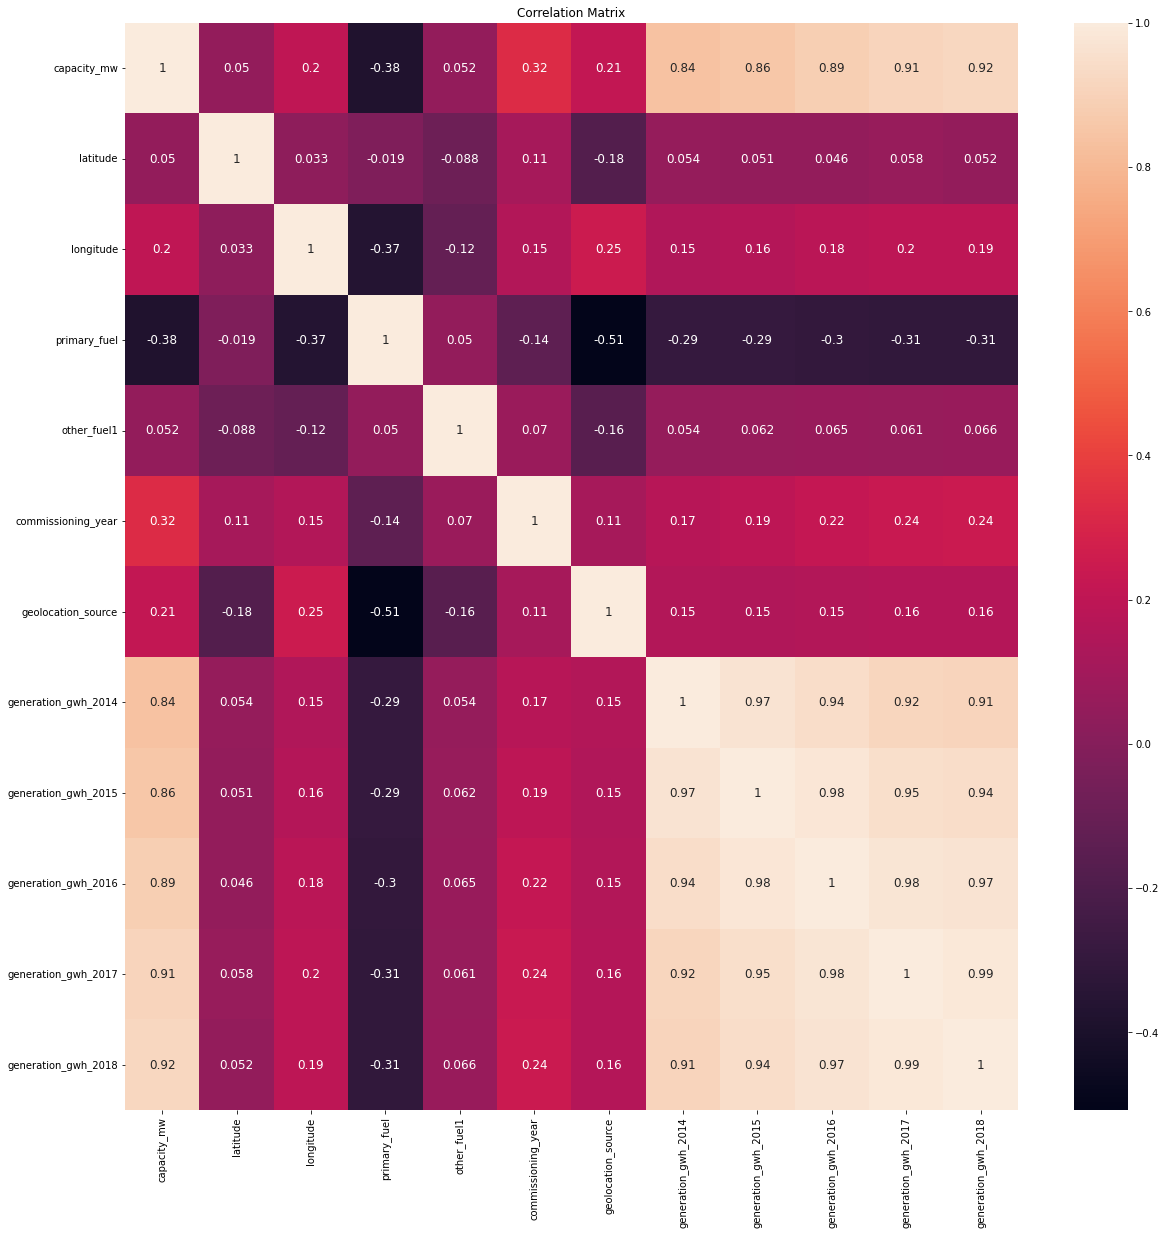

In [81]:
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

# Observation-
Let's print the correlation values of independent values with target variable for a better understanding

In [82]:
#Let's print the correlation coefficient for the Classification Prediction with primary_fuel

corr_matrix=data.corr()
corr_matrix["primary_fuel"].sort_values(ascending=True)

geolocation_source    -0.508032
capacity_mw           -0.380281
longitude             -0.366274
generation_gwh_2018   -0.312769
generation_gwh_2017   -0.311821
generation_gwh_2016   -0.302689
generation_gwh_2014   -0.292698
generation_gwh_2015   -0.291749
commissioning_year    -0.142410
latitude              -0.019233
other_fuel1            0.049981
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

# Observation-
- geolocation_source, capacity_mw, longitude, generation_gwh_2018, generation_gwh_2017, generation_gwh_2016, generation_gwh_2014, generation_gwh_2015, commissioning_year and latitude are negatively correlated to the label primary_fuel
- other_fuel1 are 4% positively correlated to the label primary_fuel showing a moderately weak bond
- geolocation_source is 50.8% negatively correlated with primary_fuel showing a strong bond
- latitude is 0.1% negatively correlated with primary_fuel showing an extremely weak bond

In [83]:
#Let's print the correlation coefficient for the Regression Prediction with capacity_mw

corr_matrix=data.corr()
corr_matrix["capacity_mw"].sort_values(ascending=True)

primary_fuel          -0.380281
latitude               0.049789
other_fuel1            0.051538
longitude              0.204324
geolocation_source     0.211651
commissioning_year     0.324521
generation_gwh_2014    0.839031
generation_gwh_2015    0.857873
generation_gwh_2016    0.887205
generation_gwh_2017    0.906152
generation_gwh_2018    0.918602
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

# Observation-
- geolocation_source, other_fuel1, primary_fuel, longitude, generation_gwh_2018, generation_gwh_2017, generation_gwh_2016, generation_gwh_2014, generation_gwh_2015, commissioning_year and latitude are positively correlated to the label capacity_mw
- primary_fuel are 38% negatively correlated to the label capacity_mw showing a moderately strong bond
- generation_gwh_2018 is 91.86% positively correlated with capacity_mw showing an extremely strong bond
- latitude is 4.98% positively correlated with capacity_mw showing an moderately weak bond

# Visualization of the Data

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64


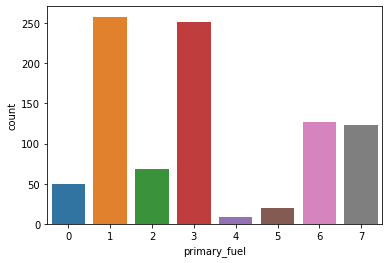

In [85]:
ax=sns.countplot(x="primary_fuel", data=data)
print(data["primary_fuel"].value_counts())

# 
50 power plant use Biomass as its primary fuel

258 power plant use Coal as its primary fuel

69 power plant use Gas as its primary fuel

251 power plant use Hydro as its primary fuel

9 power plant use Nuclear as its primary fuel

20 power plant use Oil as its primary fuel

127 power plant use Solar as its primary fuel

123 power plant use Wind as its primary fuel

2    781
1    125
0      1
Name: other_fuel1, dtype: int64


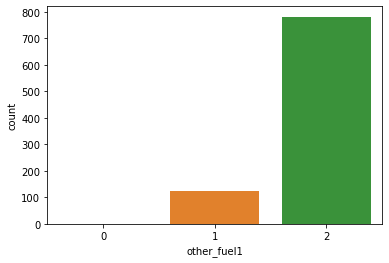

In [86]:
ax=sns.countplot(x="other_fuel1", data=data)
print(data["other_fuel1"].value_counts())

# 
1 power plant use Cogeneration as its other fuel

125 power plant use Gas as its other fuel

781 power plant use Oil as its other fuel

2    774
0    124
1      9
Name: geolocation_source, dtype: int64


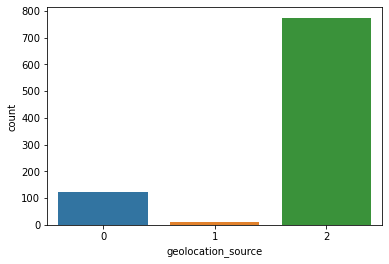

In [87]:
ax=sns.countplot(x="geolocation_source", data=data)
print(data["geolocation_source"].value_counts())

# 
For 124 power plants their geolocation source is Industry About

For 9 power plants their geolocation source is National Renewable Energy Laboratory

For 774 power plants their geolocation source is WRI

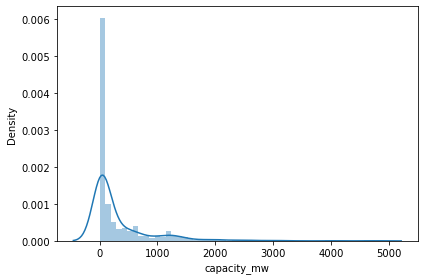

In [89]:
sns.distplot(data["capacity_mw"])
plt.xlabel("capacity_mw",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

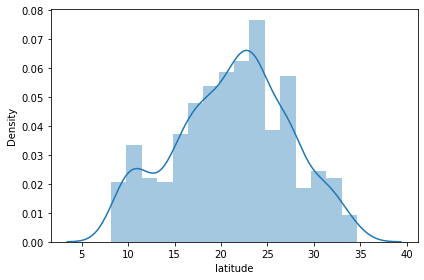

In [90]:
sns.distplot(data["latitude"])
plt.xlabel("latitude",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

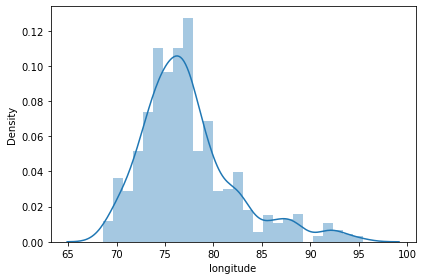

In [91]:
sns.distplot(data["longitude"])
plt.xlabel("longitude",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

<AxesSubplot:ylabel='Frequency'>

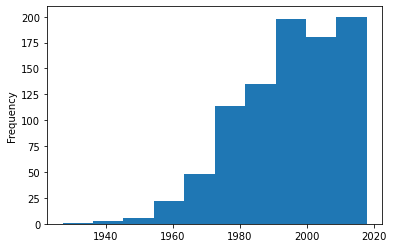

In [93]:
data.commissioning_year.plot(kind='hist')

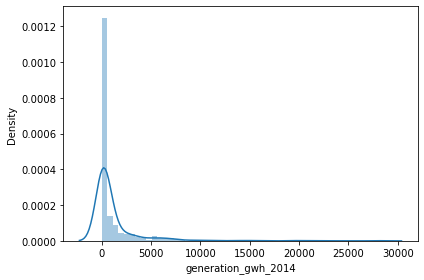

In [94]:
sns.distplot(data["generation_gwh_2014"])
plt.xlabel("generation_gwh_2014",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

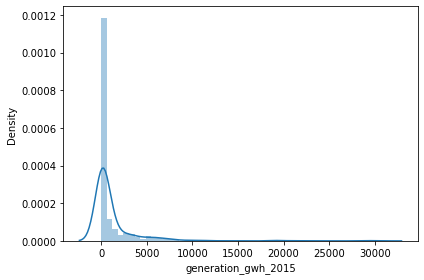

In [97]:
sns.distplot(data["generation_gwh_2015"])
plt.xlabel("generation_gwh_2015",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

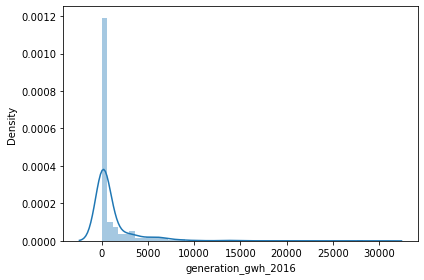

In [100]:
sns.distplot(data["generation_gwh_2016"])
plt.xlabel("generation_gwh_2016",fontsize=10)
plt.tight_layout()

# 
The data is kewed and will be dealt later

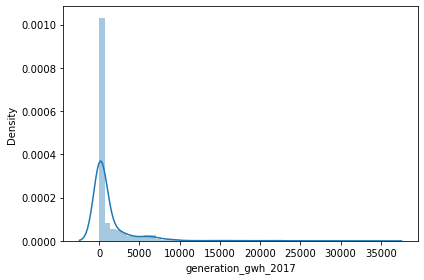

In [101]:
sns.distplot(data["generation_gwh_2017"])
plt.xlabel("generation_gwh_2017",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

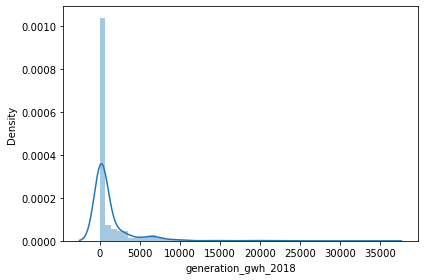

In [102]:
sns.distplot(data["generation_gwh_2018"])
plt.xlabel("generation_gwh_2018",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

In [103]:
data.shape

(907, 12)

# Checking for outliers

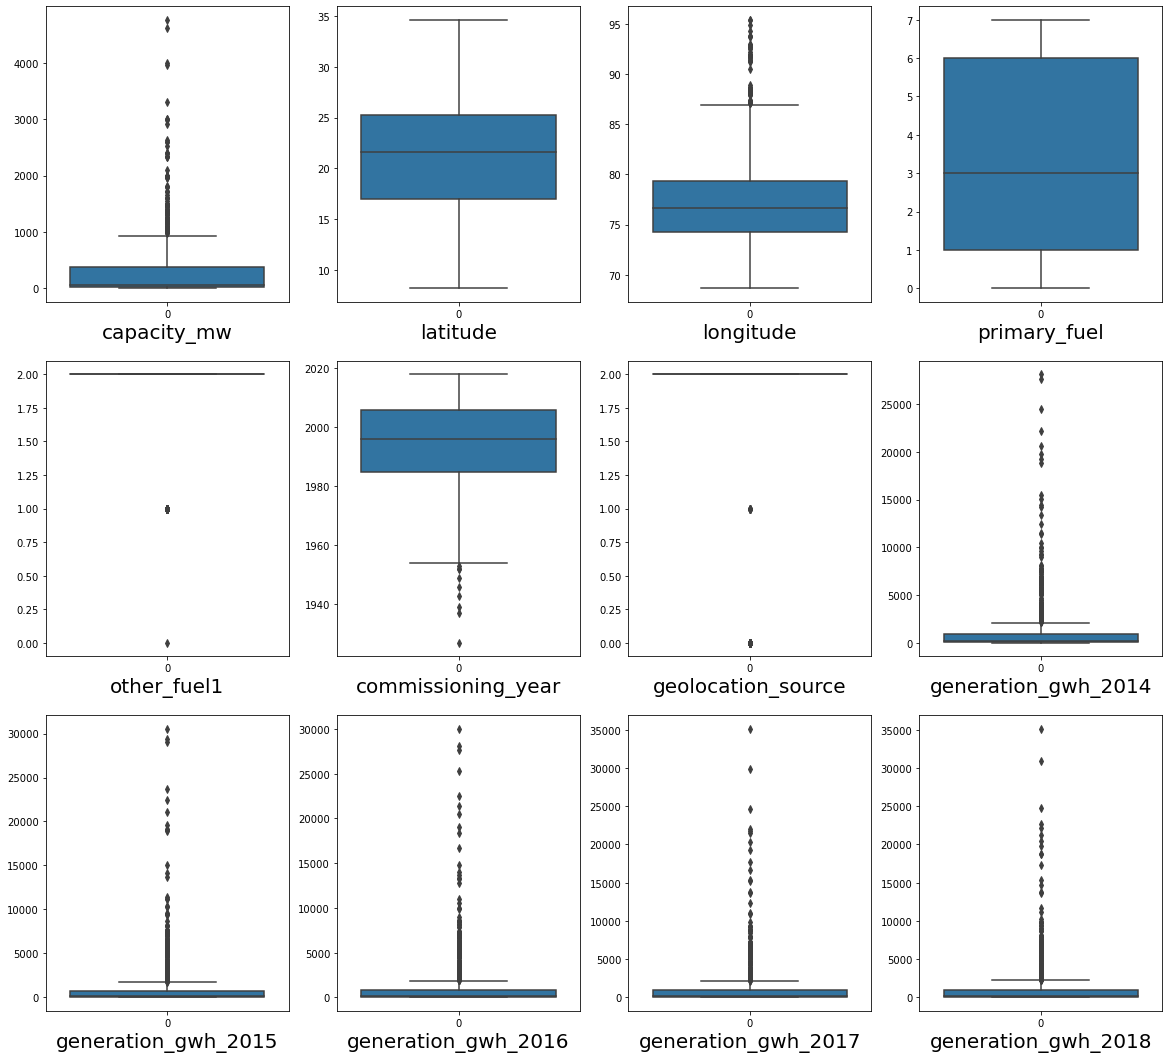

In [104]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in data:
    if graph<=13:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

# 
The features with continuous data containing outliers-

- capacity_mw
- longitude
- commissioning_year
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- generation_gwh_2018

In [105]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(907, 12)

In [106]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
       375, 414, 414, 416, 427, 482, 493, 493, 493, 493, 493, 493, 494,
       494, 494, 494, 494, 494, 499, 519, 532, 538, 546, 573, 577, 601,
       623, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
       657, 695, 695, 695, 695, 695, 695, 709, 721, 721, 721, 721, 721,
       724, 724, 724, 724, 724, 726, 726, 726, 726, 726, 726, 728, 767,
       786, 786, 786, 786, 786, 786, 788, 808, 808, 808, 808, 808, 808,
       811, 818, 880, 880, 880, 880, 880, 880], dtype=int64), array([ 0,  8,  9, 10, 11,  0,  7,  8,  9, 10, 11,  0,  7,  2,  2,  0,  7,
        8,  9, 10, 11,  2,  0,  7,  8,  9, 10, 11,  2,  2,  2,  2,  0,  0,
        7,  8,  9, 10, 11,  0,  7,  9,  2,  2,  0,  0,  7,  8,  9, 10, 11,
        0,  7,  8,  9, 10, 11,  2,  2,  7,  5,  2,  5,  2,  5,  

In [107]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(907, 12)
(860, 12)


# 
The removal of these outliers is essential, the percentage loss is 5.18% which is tolerable

# Prediction 1- Primary-fuel (As the data is categorical, classification models are used)



# Divide Data Set into features and labels

In [143]:
y_c=data_new['primary_fuel']
x_c=data_new.drop(columns=['primary_fuel'])

In [144]:
#Confirming the skewness
x_c.skew().sort_values(ascending=False)

generation_gwh_2014    2.749187
generation_gwh_2015    2.616752
generation_gwh_2016    2.571109
generation_gwh_2018    2.536255
generation_gwh_2017    2.477173
capacity_mw            2.010388
longitude              0.974769
latitude              -0.103976
commissioning_year    -0.498210
geolocation_source    -1.982817
other_fuel1           -2.112517
dtype: float64

# 
Keeping +/-0.5 as the range of skewness, the columns not falling in this range are-

generation_gwh_2014   
generation_gwh_2015      
generation_gwh_2016           
generation_gwh_2018       
capacity_mw            
longitude                 
geolocation_source          
other_fuel1              

# Transforming Data to remove skewness

In [145]:
from sklearn.preprocessing import power_transform
x_nc=power_transform(x_c)

In [146]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_nc, columns=x_c.columns)
x_skew.skew().sort_values(ascending=False)

generation_gwh_2016    0.048220
generation_gwh_2017    0.039480
capacity_mw            0.019206
longitude              0.010769
generation_gwh_2015   -0.023938
generation_gwh_2018   -0.039106
generation_gwh_2014   -0.046785
commissioning_year    -0.066706
latitude              -0.074810
geolocation_source    -1.928119
other_fuel1           -2.112517
dtype: float64

# 
Skewness has been removed, let's move forward

# Scaling the data

In [147]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Using Logistic Regression Model

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [150]:
maxAccu=0     #maximum accuracy
maxRS=0       #best random state

#Finding Best random state
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(X_scaled, y_c, test_size=0.2, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)                #fitting the data will train the model
    predrf=LR.predict(x_test)               #this is the predicted target variable
    acc=accuracy_score(y_test, predrf)      #accuracy score
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state', i)

accuracy 0.6046511627906976 random_state 0
accuracy 0.6046511627906976 random_state 0
accuracy 0.6337209302325582 random_state 1
accuracy 0.6337209302325582 random_state 1
accuracy 0.6569767441860465 random_state 2
accuracy 0.6569767441860465 random_state 2
accuracy 0.6744186046511628 random_state 3
accuracy 0.6744186046511628 random_state 3
accuracy 0.6453488372093024 random_state 4
accuracy 0.6453488372093024 random_state 5
accuracy 0.6627906976744186 random_state 6
accuracy 0.6744186046511628 random_state 7
accuracy 0.6453488372093024 random_state 8
accuracy 0.6511627906976745 random_state 9
accuracy 0.6395348837209303 random_state 10
accuracy 0.6162790697674418 random_state 11
accuracy 0.6162790697674418 random_state 12
accuracy 0.6976744186046512 random_state 13
accuracy 0.6976744186046512 random_state 13
accuracy 0.6686046511627907 random_state 14
accuracy 0.686046511627907 random_state 15
accuracy 0.5988372093023255 random_state 16
accuracy 0.563953488372093 random_state 17
accu

In [152]:
#creating train-test-sloit using best random state observed(i.e.87)
x_train, x_test, y_train, y_test= train_test_split(X_scaled, y_c, test_size=0.2, random_state=15)

In [153]:
LR=LogisticRegression()
LR.fit(x_train, y_train)                
predlr=LR.predict(x_test)               
print("Accuracy ",accuracy_score(y_test, predlr)*100)      #accuracy score
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  68.6046511627907
[[ 3  0  0  4  0  0  0  6]
 [ 1 31  1  2  0  0  0  1]
 [ 0  4  1  5  0  1  0  3]
 [ 0  5  0 35  0  0  0  8]
 [ 0  1  0  2  0  0  0  0]
 [ 0  1  0  2  0  1  0  1]
 [ 0  0  0  0  0  0 28  0]
 [ 0  2  0  3  0  1  0 19]]
              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.70      0.86      0.78        36
           2       0.50      0.07      0.12        14
           3       0.66      0.73      0.69        48
           4       0.00      0.00      0.00         3
           5       0.33      0.20      0.25         5
           6       1.00      1.00      1.00        28
           7       0.50      0.76      0.60        25

    accuracy                           0.69       172
   macro avg       0.56      0.48      0.47       172
weighted avg       0.67      0.69      0.65       172



# Using Decision Tree Classifier

In [154]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)      #accuracy score
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  72.67441860465115
[[12  0  0  0  0  0  0  1]
 [ 0 26  1  5  0  1  1  2]
 [ 0  2  5  5  1  0  0  1]
 [ 0  6  3 36  0  0  0  3]
 [ 0  1  1  0  1  0  0  0]
 [ 0  1  1  3  0  0  0  0]
 [ 0  0  0  0  0  0 27  1]
 [ 4  1  0  2  0  0  0 18]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.70      0.72      0.71        36
           2       0.45      0.36      0.40        14
           3       0.71      0.75      0.73        48
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         5
           6       0.96      0.96      0.96        28
           7       0.69      0.72      0.71        25

    accuracy                           0.73       172
   macro avg       0.60      0.60      0.59       172
weighted avg       0.70      0.73      0.71       172



# Using Random Forest CLassifier

In [158]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)      #accuracy score
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  79.06976744186046
[[11  0  0  0  0  0  0  2]
 [ 1 30  0  3  0  0  0  2]
 [ 1  4  4  5  0  0  0  0]
 [ 0  1  1 45  0  0  0  1]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  2  2  0  0  0  1]
 [ 0  0  0  0  0  0 28  0]
 [ 3  1  1  2  0  0  0 18]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.81      0.83      0.82        36
           2       0.44      0.29      0.35        14
           3       0.78      0.94      0.85        48
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        28
           7       0.75      0.72      0.73        25

    accuracy                           0.79       172
   macro avg       0.56      0.58      0.56       172
weighted avg       0.75      0.79      0.76       172



# Using SVC

In [120]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  76.74418604651163
[[ 6  0  0  1  0  0  2]
 [ 1 48  0  5  0  0  0]
 [ 0  1  0  6  0  0  1]
 [ 1  6  0 30  0  0  5]
 [ 0  0  1  0  0  0  4]
 [ 0  0  0  0  0 27  0]
 [ 5  1  0  0  0  0 21]]
              precision    recall  f1-score   support

           0       0.46      0.67      0.55         9
           1       0.86      0.89      0.87        54
           2       0.00      0.00      0.00         8
           3       0.71      0.71      0.71        42
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        27
           7       0.64      0.78      0.70        27

    accuracy                           0.77       172
   macro avg       0.52      0.58      0.55       172
weighted avg       0.72      0.77      0.74       172



# Cross Validation

In [121]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x_c,y_c,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.44302325581395346


In [122]:
scr2=cross_val_score(dt,x_c,y_c,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr2.mean())

Cross validation score of Decision Tree Classifier:  0.6906976744186046


In [123]:
scr3=cross_val_score(rf,x_c,y_c,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr3.mean())

Cross validation score of Random Forest Classifier:  0.7813953488372094


In [124]:
scr4=cross_val_score(svc,x_c,y_c,cv=5)
print("Cross validation score of SVC model: ", scr4.mean())

Cross validation score of SVC model:  0.3848837209302326


# 
Random Forest Classifier is performing better, hence it is carried forward

# Hyper Parameter Tuning

In [125]:
RandomForestClassifier()

RandomForestClassifier()

In [126]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'], 'max_depth':[4,5,6,7,8], 'criterion':['gini', 'entropy']}

In [127]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring="accuracy")
GCV.fit(x_train,y_train)       #fitting data in the model
GCV.best_params_               #printing the best parameters found in GridSearchCV

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [166]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [167]:
GCV_pred=GCV.best_estimator_.predict(x_test)        #Predicting with best parameters
accuracy_score(y_test,GCV_pred) 

0.9127906976744186

# 
Final Accuracy is 91.2% which depicts that our model is working well

# Saving the Random Forest Classifier Model for Prediction 1- Primary Fuel 

In [168]:
filename='Global Power Plant Prediction 1- Primary Fuel.pkl'
pickle.dump(LR, open(filename,'wb'))

# Prediction 2- capacity_mw (As the data is continuous, regression models are used)

# Divide Data Set into features and labels

In [161]:
y_r=data_new['capacity_mw']
x_r=data_new.drop(columns=['capacity_mw'])

In [162]:
#Confirming the skewness
x_r.skew().sort_values(ascending=False)

generation_gwh_2014    2.749187
generation_gwh_2015    2.616752
generation_gwh_2016    2.571109
generation_gwh_2018    2.536255
generation_gwh_2017    2.477173
longitude              0.974769
primary_fuel           0.413656
latitude              -0.103976
commissioning_year    -0.498210
geolocation_source    -1.982817
other_fuel1           -2.112517
dtype: float64

# 
Keeping +/-0.5 as the range of skewness, the columns not falling in this range are-

generation_gwh_2014   
generation_gwh_2015      
generation_gwh_2016           
generation_gwh_2018 
generation_gwh_2017
primary_fuel            
longitude                 
geolocation_source          
other_fuel1  

# Transforming Data to remove skewness

In [164]:
from sklearn.preprocessing import power_transform
x_nr=power_transform(x_r)

In [165]:
#Checking if skewness was rectified
x_skew_r=pd.DataFrame(x_nr, columns=x_r.columns)
x_skew_r.skew().sort_values(ascending=False)

generation_gwh_2016    0.048220
generation_gwh_2017    0.039480
longitude              0.010769
generation_gwh_2015   -0.023938
generation_gwh_2018   -0.039106
generation_gwh_2014   -0.046785
primary_fuel          -0.060307
commissioning_year    -0.066706
latitude              -0.074810
geolocation_source    -1.928119
other_fuel1           -2.112517
dtype: float64

# 
Skewness has been removed, let's move forward

# Scaling the data

In [169]:
scaler=StandardScaler()
X_scaled_r=scaler.fit_transform(x_skew_r)

# Using Linear Regression Model

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()

#Finding Best random state
for i in range(0,100):
    features_train, features_test, target_train, target_test= train_test_split(X_scaled_r, y_r, test_size=0.2, random_state=i)
    lr.fit(features_train, target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print("At random state ",i, "the training accuracy is:- ",r2_score(target_train,pred_train))
    print("At random state ",i, "the testing accuracy is:- ",r2_score(target_test,pred_test))
    print("\n")

At random state  0 the training accuracy is:-  0.6545897498288216
At random state  0 the testing accuracy is:-  0.6837505379867606


At random state  1 the training accuracy is:-  0.6608934053464302
At random state  1 the testing accuracy is:-  0.6860752443531977


At random state  2 the training accuracy is:-  0.6624563434446524
At random state  2 the testing accuracy is:-  0.6801897920594748


At random state  3 the training accuracy is:-  0.6707603364311054
At random state  3 the testing accuracy is:-  0.5998584008272592


At random state  4 the training accuracy is:-  0.6957394677715039
At random state  4 the testing accuracy is:-  0.5321938539583717


At random state  5 the training accuracy is:-  0.6850364366132315
At random state  5 the testing accuracy is:-  0.5907462285209247


At random state  6 the training accuracy is:-  0.6460668332663173
At random state  6 the testing accuracy is:-  0.7340711547951362


At random state  7 the training accuracy is:-  0.6681755304251606
At 

In [172]:
#Applying the best random state found(i.e. 32)

features_train, features_test, target_train, target_test= train_test_split(X_scaled_r, y_r, test_size=0.2, random_state=32)
lr.fit(features_train, target_train)
pred_test=lr.predict(features_test)
print(r2_score(target_test,pred_test))

0.6661738466579818


# Cross Validation of the model

In [173]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X_scaled_r,y_r,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",j," the cv score is ", cv_mean," and accuracy score for the training is ",Train_accuracy," and the accuracy score for the testing is ",Test_accuracy)
    print("\n")

At cross fold  2  the cv score is  0.5980282050147474  and accuracy score for the training is  -0.6195344391943802  and the accuracy score for the testing is  0.6661738466579818


At cross fold  3  the cv score is  0.6040447516051705  and accuracy score for the training is  -0.6195344391943802  and the accuracy score for the testing is  0.6661738466579818


At cross fold  4  the cv score is  0.6089145954482467  and accuracy score for the training is  -0.6195344391943802  and the accuracy score for the testing is  0.6661738466579818


At cross fold  5  the cv score is  0.6091049866749135  and accuracy score for the training is  -0.6195344391943802  and the accuracy score for the testing is  0.6661738466579818


At cross fold  6  the cv score is  0.6132997764876804  and accuracy score for the training is  -0.6195344391943802  and the accuracy score for the testing is  0.6661738466579818


At cross fold  7  the cv score is  0.6173667720428643  and accuracy score for the training is  -0.61

# 
Since the number of folds don't have such impact on the accuracy and cv score. So cv=4 is selected

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

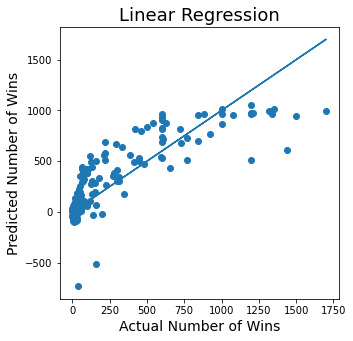

In [174]:
plt.figure(figsize=(5,5))
plt.scatter(x=target_test, y=pred_test)
plt.plot(target_test, target_test)
plt.xlabel('Actual Number of Wins', fontsize=14)
plt.ylabel('Predicted Number of Wins', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

# 
The Best Fit Line shows the least values of residuals and covering most of the data point, showing a good fit for our model

# Regularization

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01,.1, 1, 10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [176]:
ls=Lasso(alpha=1, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train, target_train)
pred_ls=ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.668169632114832

In [178]:
cv_score=cross_val_score(ls,X_scaled_r,y_r,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.6099812360533633

# Using Random Forest Regressor Model

In [179]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'], 'max_features':["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [182]:
rf=RandomForestRegressor(criterion="mae", max_features="sqrt")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score: ', rfs*100)

rfscore=cross_val_score(rf,X_scaled_r,y_r,cv=4)
rfc=rfscore.mean()
print("Cross Val Score:", rfc*100)

R2 Score:  85.43891312893186
Cross Val Score: 85.49732542367087


# As the model accuracy and cross validation both are 85%, the model seems to be performing well

# Saving the Random Forest Regressor Model for Prediction 2- capacity_mw

In [183]:
filename='Global Power Plant Prediction 2- capacity_mw.pkl'
pickle.dump(LR, open(filename,'wb'))